### Install Libraries

In [ ]:
# Install OpenCV
%pip install opencv-python

### Import Libraries

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import heapq

### Question 1

In [72]:
# Function to find if the shape is a rectangle or a square and then find its parameter and centeroid
def DetermineFigure(image):

    # Calculate the histogram of the grayscale image
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Create a Matplotlib figure with two subplots: one for the image and one for the histogram
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    # Display the grayscale image in the first subplot
    ax1.imshow(image, cmap='gray')
    ax1.axis('off')  # Turn off the axes

    # Display the histogram in the second subplot
    ax2.plot(histogram)
    ax2.set_xlim([0, 256])
    ax2.set_title('Histogram')

    # Show the figure
    plt.show()

    # Find the coordinates of white pixels (255) in the binary image
    white_pixel_coords = np.column_stack(np.where(image == 255))

    # Calculate the width and height of the figure
    width = np.max(white_pixel_coords[:, 1]) - np.min(white_pixel_coords[:, 1]) + 1
    height = np.max(white_pixel_coords[:, 0]) - np.min(white_pixel_coords[:, 0]) + 1

    # Calculate the centroid
    centroid_x = int(np.mean(white_pixel_coords[:, 1]))
    centroid_y = int(np.mean(white_pixel_coords[:, 0]))

    # Determine if it's a square or rectangle
    if width == height:
        shape = "Square"
    else:
        shape = "Rectangle"

    # Print shape and parameters
    print(f"Shape: {shape}")
    print(f"Width: {width}")
    print(f"Height: {height}")
    print(f"Parameter: {2*width + 2*height}")
    print(f"Centroid: ({centroid_x}, {centroid_y})")

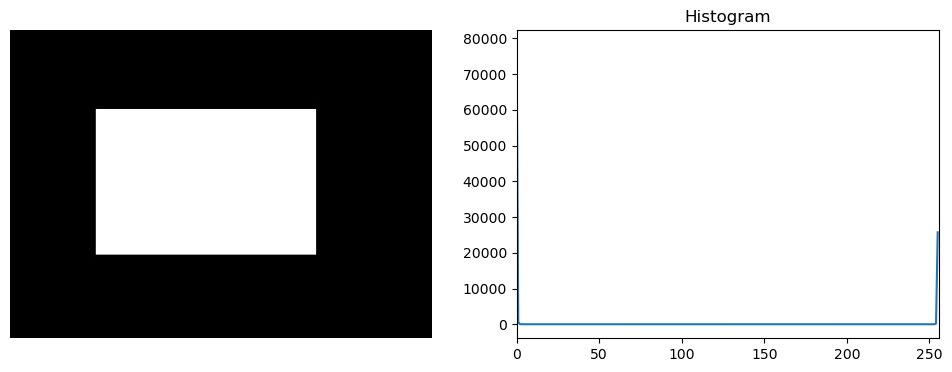

Shape: Rectangle
Width: 198
Height: 131
Parameter: 658
Centroid: (175, 135)


In [73]:
# Load the image
image = cv2.imread('Data/rect1.jpg', cv2.IMREAD_GRAYSCALE)  

# Check if the image was loaded successfully
if image is not None:
    DetermineFigure(image)
    
else:
    print("Failed to load image.")

### Question 2

In [4]:
# Function which takes in images as input and then determines which is boy and which is girl
def DetermineGender(image1, image2):

    # Apply edge detection (Canny)
    edges = cv2.Canny(image1, 50, 150)

    # Apply a threshold to isolate the hair region
    hair_threshold = 200
    hair_mask = (edges > hair_threshold).astype(np.uint8)

    '''
    # Find the top and bottom boundaries of the hair region
    top_boundary = np.min(np.where(hair_mask == 1)[0])
    bottom_boundary = np.max(np.where(hair_mask == 1)[0])

    # Calculate the length of hair in pixels
    hair_length_pixels = bottom_boundary - top_boundary
    '''
    # Display the original image
    cv2.imshow('Original Image', image1)

    # Display the Canny edge image
    cv2.imshow('Canny Edges', edges)
    
    # Display the hair region (optional)
    cv2.imshow('Hair Region', hair_mask)

    # Wait for a key press and close the windows
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
image1 = cv2.imread('Data/fig3.jpg')
image2 = cv2.imread('Data/fig4.jpg')

# Check if the image was loaded successfully
if image1 is not None and image2 is not None:

    # Convert the colored images to grayscale
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
    DetermineGender(image1, image2)
    
else:
    print("Failed to load image.")

### Question 3

In [4]:
# Function which takes in two identical images as input and then determines which is blurred and which is not
def DetermineBlurness(image1,image2):

    # Apply Laplacian operator to compute Laplacian variances
    laplacian_image1 = cv2.Laplacian(image1, cv2.CV_64F).var()
    laplacian_image2 = cv2.Laplacian(image2, cv2.CV_64F).var()

    # if image 1 is blurred 
    if laplacian_image1 < laplacian_image2:
        label_image1 = "Blurred"
        label_image2 = "Not Blurred"

    # If image 2 is blured
    else:
        label_image1 = "Not Blurred"
        label_image2 = "Blurred"
    
    # Write the labels on the images
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    font_thickness = 2
    font_color = (0, 255, 0)  # Green color
    y_position = 35  # Adjust the y-position as needed

    cv2.putText(image1, label_image1, (10, y_position), font, font_scale, font_color, font_thickness, cv2.LINE_AA)
    cv2.putText(image2, label_image2, (10, y_position), font, font_scale, font_color, font_thickness, cv2.LINE_AA)

    # Display or save the labeled images
    cv2.imshow('Image 1', image1)
    cv2.imshow('Image 2', image2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [5]:
image1 = cv2.imread('Data/fig5.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('Data/fig5_blur.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if image1 is not None and image2 is not None:
    DetermineBlurness(image1, image2)
else:
    print("Failed to load image.")

### Question 4

In [17]:
# Function to determine area of 4 bars
def DetermineArea(image):
    # Calculate the histogram of the grayscale image
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Display the histogram
    plt.subplot(1, 2, 2)
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.plot(histogram)
    plt.xlim([0, 256])

    # Show the images and histogram
    plt.tight_layout()
    plt.show()

    # Flatten the histogram into a 1D array
    histogram = histogram.flatten()

    # Use heapq's nlargest to get the top 4 greatest values
    top_4_max_values = heapq.nlargest(4, histogram)
    print(top_4_max_values)

    area1 =str(max(top_4_max_values))
    top_4_max_values.remove(max(top_4_max_values))
    area2 =str(max(top_4_max_values))
    top_4_max_values.remove(max(top_4_max_values))
    area3 =str(max(top_4_max_values))
    top_4_max_values.remove(max(top_4_max_values))
    area4 =str(max(top_4_max_values))

    # Write the labels on the images
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.5
    font_thickness = 1
    font_color = (0, 255, 0)  
    cv2.putText(image, area1, (245, 150), font, font_scale, font_color, font_thickness, cv2.LINE_AA)

    cv2.putText(image, area2, (5, 150), font, font_scale, font_color, font_thickness, cv2.LINE_AA)

    cv2.putText(image, area3, (165, 150), font, font_scale, font_color, font_thickness, cv2.LINE_AA)

    cv2.putText(image, area4, (85, 150), font, font_scale, font_color, font_thickness, cv2.LINE_AA)

    # Display or save the labeled images
    cv2.imshow('Grayscale Image', image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

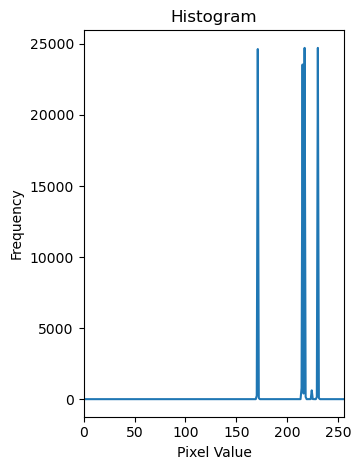

[24721.0, 24720.0, 24640.0, 23551.0]


In [18]:
image = cv2.imread('Data/fig1.jpg')

# Check if the image was loaded successfully
if image is not None:

    # Convert the colored images to grayscale
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    DetermineArea(image)
    
else:
    print("Failed to load image.")

### Question 5

### Question 6

In [67]:
# Function to segment the bones of a finger
def SegmentBones(image):

    # Calculate the histogram
    histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

    # Display the image
    plt.figure(figsize=(12, 4))
    plt.subplot(121)
    plt.imshow(image, cmap='gray')
    plt.title('Image')

    # Display the histogram
    plt.subplot(122)
    plt.plot(histogram)
    plt.title('Histogram')
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.xlim(0,255)
    plt.ylim(0,600)

    plt.show()



    # Create a binary mask based on the intensity range
    binary_mask = cv2.inRange(image, 105, 120)

    # Apply the binary mask to the original image to segment it
    segmented_image1 = cv2.bitwise_and(image, image, mask=binary_mask)

    
    # Create a binary mask based on the intensity range
    binary_mask = cv2.inRange(image, 180, 200)

    # Apply the binary mask to the original image to segment it
    segmented_image2 = cv2.bitwise_and(image, image, mask=binary_mask)
    
    # Create a binary mask based on the intensity range
    binary_mask = cv2.inRange(image, 10, 50)

    # Apply the binary mask to the original image to segment it
    segmented_image3 = cv2.bitwise_and(image, image, mask=binary_mask)
    
    # Create a binary mask based on the intensity range
    binary_mask = cv2.inRange(image, 50, 105)

    # Apply the binary mask to the original image to segment it
    segmented_image4 = cv2.bitwise_and(image, image, mask=binary_mask)


    # Show the images in their respective windows
    cv2.imshow('Segment 1', segmented_image1)
    cv2.imshow('Segment 2', segmented_image2)
    cv2.imshow('Segment 3', segmented_image3)
    cv2.imshow('Segment 4', segmented_image4)

    # Wait for a key press and close the windows when a key is pressed
    cv2.waitKey(0)
    cv2.destroyAllWindows()





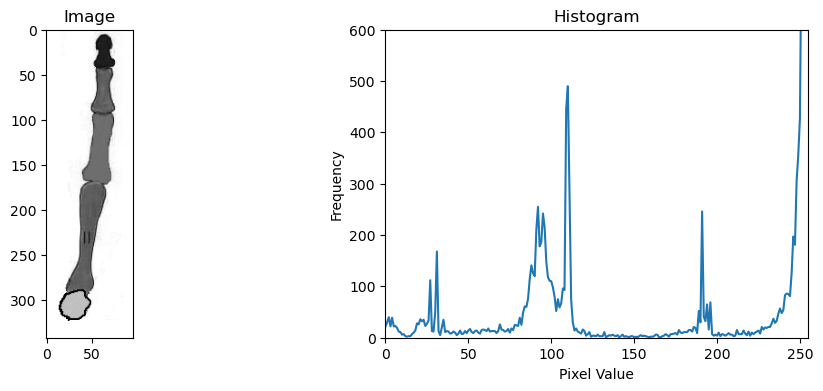

In [68]:
image = cv2.imread('Data/finger-bones.jpg')

# Check if the image was loaded successfully
if image is not None:

    # Make the image more vibrant

    # Convert the image from BGR to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Increase the saturation (adjust the value as needed)
    saturation_factor = 3.0  
    hsv_image[..., 1] = np.clip(hsv_image[..., 1] * saturation_factor, 0, 255)

    # Convert the image back to BGR color space
    vibrant_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)

    image = cv2.cvtColor(vibrant_image, cv2.COLOR_BGR2GRAY)

    SegmentBones(image)
    
else:
    print("Failed to load image.")